# Relaxation method

> **Questions**
>
> -   How do I use the relaxation method to solve Laplace’s equation?

> **Objectives**
>
> -   Use the finite difference method to convert Laplace’s equation
>     into a set of linear simultaneous equations
> -   Use the relaxation method to solve Laplace’s equation

### The method of finite differences is often used to solve partial differential equations

Consider the two-dimensional Laplace equation for the electric potential
$\phi$ subject to appropriate boundary conditions:

Real physical problems are in three dimensions, but we can more easily
visualise the method of finite differences - and the extension to three
dimensions is straight forward.

The method of finite differences, which has already been introduced
earlier in the course, involves dividing the space into a grid of
discrete points $[x,y]$ and calculating numerical derivatives or at each
of these points.

<img src="../images/electrostatics2.png" width="200" >

In this case we consider a 2-dimensional sheet with a fixed voltage $V$
at the top side, and all other sides fixed at $0V$.

As a quick recap from what was learnt earlier in the course, we can
express the Laplacian in two dimensions using finite differences:

The expression above is known as a <mark>five-point stencil</mark> as it
uses five points to calculate the Laplacian.

### The finite difference method turns our partial differential equation into a set of linear simulatenous equation

Returning to our Laplace equation for for the electric potential $\phi$:

<img src="../images/electrostatics2.png" width="200" >

The numerical Laplacian can be substituted into the equation above,
giving us a set of $n$ simulatenous equations for the $n$ grid points.

where $h$ is the distance between each grid point.

### To solve this set of equations we use the relaxation method

To calculate $\phi(x,y)$ we use the relaxation method, also known as the
Jacobi method in the context of the Laplace equation. First we
re-arrange the equation above:

<mark> Note that because we set the Laplacian equal to zero in Equation
3 (for this particular example), the $h^2$ term has dropped out of the
expression - this might not be the case for other examples. </mark>

This tells us that $\phi(x,y)$ is the average of the surrounding grid
points, which can be represented visually as:

<img src="../images/electrostatics3.png" width="200" >

Second, we fix $\phi(x,y)$ at the boundaries using the boundary
conditions. Third, we guess the initial values of the interior
$\phi(x,y)$ points - our guesses do not need to be good, and can be
zero.

Finally we use Equation 4 to calculate new values of $\phi'(x,y)$ at all
points in space. We take these new $\phi'(x,y)$ values and feed them
into Equation 4 again to calculate new values. We repeat this iterative
process until the $\phi(x,y)$ values converge, and that is our solution.

Convergence can be tested by specifying what the maximum difference
should be between iterations. For example, that
$\phi'(x,y)-\phi(x,y)< 1e-5$ for all grid points.

### The relaxation method is limited by the accuracy of the finite difference method

-   For solving PDEs we use the finite difference method (as part of the
    relaxation method).
-   Even if we use a very small target accuracy for convergence of the
    relaxation method, our accuracy will still be limited by the finite
    differences. Higher-order finite difference methods (such as the
    5-point or 7-point methods) can be used here to improve the overrall
    accuracy of the calculation.

### The relaxation methods can be applied using the Python skills we have developed

We will now use our Python Skillz to solve Laplace’s equation with the
boundary conditions outlined above. Let’s also imagine that the sheet is
1m along each side and that we want a grid spacing of 1cm. First let’s
import the libraries we will use:

In [95]:
import numpy as np
import matplotlib.pyplot as plt

Now let’s specify our simulation parameters…

In [96]:
grid_width = 101 # number of grid points for width of simulation
grid_height = 101 # number of grid points for height of simulation
target = 1e-6 # target accuracy to complete convergence

…and our boundary conditions:

In [97]:
V_top = 1.0 # top wall voltage, in volts
V_left = 0.0 # left wall voltage
V_right = 0.0 # right wall voltage
V_bottom = 0.0 # bottom wall voltage

Next let’s create a NumPy array to hold our $\phi(x,y)$ and $\phi'(x,y)$
values:

In [98]:
phi = np.zeros([grid_height,grid_width], float)
phi_prime = np.empty([grid_height,grid_width], float)

Now we apply the boundary conditions to our array:

In [99]:
phi[0,:] = V_top

Now we write a function which uses the finite difference method to
calculate an updated $\phi'(x,y)$ .

In [100]:
def finite_difference(phi):

    for i in range(grid_height): # for each grid point
        for j in range(grid_width):
            if i==0 or i==grid_height-1 or j==0 or j==grid_width-1:
                phi_prime[i,j] = phi[i,j] # if at boundary, keep fixed
            else: # otherwise apply finite difference
                phi_prime[i,j] = (phi[i+1,j]+phi[i-1,j]+phi[i,j+1]+phi[i,j-1]) / 4
    
    return phi_prime

Finally let’s use the relaxation method. We repeatedly call the function
`finite_difference` until all values of $\phi(x,y)$ are converged.

In [101]:
delta = 1.0 # create delta. It can take any value larger than the target accuracy

while delta > 1e-6:  # keep running the following code until delta < 1e-6
    phi_prime = finite_difference(phi)  # calculate phi_prime
    delta = np.max(np.abs(phi-phi_prime)) # calculate the maximum difference between phi and phi_prime
    phi,phi_prime = phi_prime,phi # Swap phi and phi-prime, ready for the next iteration

We can visualise our result using the function
`matplotlib.pyplot.imshow` which displays our data as an image:

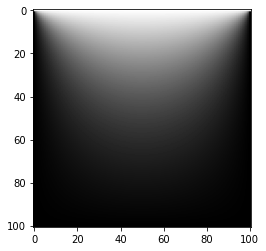

In [103]:
plt.imshow(phi_prime)

This result makes sense: there is a region of high electric potential
around the top side of the sheet, where the voltage is fixed at 1V, and
regions of low potential around the other three walls. If we would like
a colour bar to indicate the $\phi(x,y)$ values across the image then we
can use the function `matplotlib.pyplot.contourf` to produce a filled
contour plot. Note that this function flips our image (plotting the
values held in the array from left to right, top to bottom) so we use
`numpy.flip` to achieve the expected result.

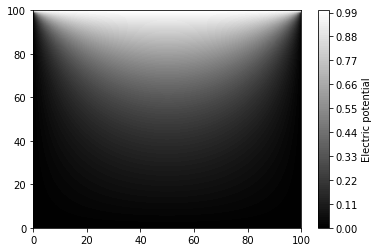

In [106]:
plt.contourf(np.flip(phi_prime),levels=np.linspace(0,1,101))
plt.colorbar().set_label("Electric potential")

> **Keypoints**
>
> -   The finite difference method for numerical derivatives is often
>     used to solve partial differential equations
> -   The finite difference method turns our partial differential
>     equation into a set of linear simulatenous equation
> -   To solve this set of equations we use the relaxation method
> -   The relaxation method is limited by the accuracy of the finite
>     difference method
> -   The relaxation and finite difference methods can be applied using
>     the Python skills we have developed

### Test your understanding

> **Boundary conditions**
>
> In this tutorial we implement a finite difference method to solve
> Laplace’s equation. We use fixed boundary conditions, which are an
> example of [Dirichlet-type boundary
> conditions](https://math.libretexts.org/Bookshelves/Differential_Equations/Book%3A_Partial_Differential_Equations_(Walet)/03%3A_Boundary_and_Initial_Conditions/3.02%3A_Explicit_Boundary_Conditions).
>
> ``` python
> def finite_difference(phi):
>
>     for i in range(grid_height): # for each grid point
>         for j in range(grid_width):
>             if i==0 or i==grid_height-1 or j==0 or j==grid_width-1:
>                 phi_prime[i,j] = phi[i,j] # if at boundary, keep fixed
>             else: # otherwise apply finite difference
>                 phi_prime[i,j] = (phi[i+1,j]+phi[i-1,j]+phi[i,j+1]+phi[i,j-1]) / 4
>     
>     return phi_prime
> ```
>
> Another form of boundary condition is a Periodic Boundary Condition.
> PBCs are often chosen for approximating a large (infinite) system by
> using a small part called a unit cell, and are most famously used for
> modelling periodic crystals in solid state physics. Mathematically,
> PBCs can be expressed for $f(x,y)$ on a two dimensional $N \times N$
> grid as:
>
> Write a function which calculates `phi_prime` using a finite
> difference method with periodic boundary conditions.
>
> > **Show answer**
> >
> > ``` python
> > def finite_difference(phi):
> >
> >     for i in range(N): # for each grid point
> >         for j in range(N):
> >     
> >             i1 = i+1
> >             j1 = j+1
> >             i2 = i-1
> >             j2 = j-1
> >             
> >             if i == N-1:
> >                 i1 = 0
> >             if i == 0:
> >                 i2 == N-1
> >             if j == N-1:
> >                 j1 = 0
> >             if j == 0:
> >                 j2 == N-1
> >
> >             phi_prime[i,j] = (phi[i1,j]+phi[i2,j]+phi[i,j1]+phi[i,j2]) / 4
> >     
> >     return phi_prime
> > ```